In [2]:
import numpy as np

# Jouer avec des points

On considère $Y$ les points sur la droite aux valeurs  1, 3, 7, 2 (c'est juste un vecteur).

In [3]:
Y = np.array([1, 3, 7, 2])

On va calculer toute les différences entre ces valeurs. On construit un matrice `M` telle que `M[i,j] = Y[i] - Y[j]` et `i` et `j` sont deux indices pour tous les identifiants de points possibles. Pour cela, on peut utiliser le broadcasting... 

On constuit `Y - Y.T`, mais il faut transformer le vecteurs 1d `Y` en matrices `a` et `b` de taille (4, 1) et (1, 4)

In [4]:
a = Y.reshape((4,1))
b = Y.reshape((1,4))
a, b

(array([[1],
        [3],
        [7],
        [2]]),
 array([[1, 3, 7, 2]]))

Une autre façon de procéder est d'ajouter un axe avec `np.newaxis`. Observer `Y[:, np.newaxis]`. En déduire comment construire `a` et `b` autrement.

In [5]:
a = Y[:, np.newaxis]
b = Y[np.newaxis, :]
a , b

(array([[1],
        [3],
        [7],
        [2]]),
 array([[1, 3, 7, 2]]))

On peut calculer les distances au carré de chaque point vers chaque autre point.

In [6]:
(a - b)

array([[ 0, -2, -6, -1],
       [ 2,  0, -4,  1],
       [ 6,  4,  0,  5],
       [ 1, -1, -5,  0]])

In [7]:
d = (a-b)**2

In [8]:
d

array([[ 0,  4, 36,  1],
       [ 4,  0, 16,  1],
       [36, 16,  0, 25],
       [ 1,  1, 25,  0]])

Quel est le point le plus proche de chaque point ? Regardez la documentation de `np.argsort`. Voyez par exemple 

    np.argsort(np.array([1, 0, 12, 2]))
    
Appliquez cela sur la matrice des distance en prenant le bon axe!

In [2]:
np.argsort?

In [9]:
np.argsort(np.array([1, 0, 12, 2]))

array([1, 0, 3, 2])

In [10]:
np.argsort(d, axis=1)

array([[0, 3, 1, 2],
       [1, 3, 0, 2],
       [2, 1, 3, 0],
       [3, 0, 1, 2]])

On recommence avec maintenant des points en dimension 2. On va alors calculer toutes les distances au carré entre ces points.  

Tirer aléatoirement $X$, un jeu de données de 10 points dans $[0, 1]^2$. On utilise `np.random.rand`.

In [11]:
X = np.random.rand(10,2)
X

array([[0.02440577, 0.74004515],
       [0.04617169, 0.77779894],
       [0.9829781 , 0.96047433],
       [0.01651645, 0.5620916 ],
       [0.70446561, 0.71654119],
       [0.75299186, 0.55684779],
       [0.57875808, 0.90644961],
       [0.7217755 , 0.51727325],
       [0.02681079, 0.6654631 ],
       [0.39874559, 0.25185978]])

On peut les tracer sur un petit diagramme.

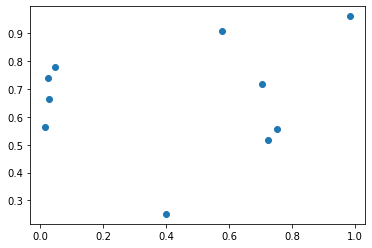

In [13]:
from matplotlib import pyplot as plt

plt.scatter(X[:, 0], X[:, 1])

Dans `X` la première dimension représente le numéro du point et la deuxième dimension les coordonnées de ce point ($x_1$, $x_2$). 

Maintenant on calcule les `a` et `b` comme tout à l'heure. On ajoute une dimension pour créer un objet en 3 dimensions ($n1=10$, $n2=10$, $x$) à partir de $X$ qui était en dimensions $n=10$ et $x=2$. 

Par la somme ou la différence, on aura dans a[i, j, k] - b[i, j, k] = X[i, k] - X[j, k] 

In [14]:
a = X[:, np.newaxis, :]

In [16]:
print(a.shape)
print(a)

(10, 1, 2)
[[[0.02440577 0.74004515]]

 [[0.04617169 0.77779894]]

 [[0.9829781  0.96047433]]

 [[0.01651645 0.5620916 ]]

 [[0.70446561 0.71654119]]

 [[0.75299186 0.55684779]]

 [[0.57875808 0.90644961]]

 [[0.7217755  0.51727325]]

 [[0.02681079 0.6654631 ]]

 [[0.39874559 0.25185978]]]


In [17]:
b = X[np.newaxis, :, :]
print(b.shape)
print(b)

(1, 10, 2)
[[[0.02440577 0.74004515]
  [0.04617169 0.77779894]
  [0.9829781  0.96047433]
  [0.01651645 0.5620916 ]
  [0.70446561 0.71654119]
  [0.75299186 0.55684779]
  [0.57875808 0.90644961]
  [0.7217755  0.51727325]
  [0.02681079 0.6654631 ]
  [0.39874559 0.25185978]]]


On peut calculer la différence au carré pour chaque coordonnée. 

In [19]:
d_comp = (a-b)**2
print(d_comp.shape)
print(d_comp)

(10, 10, 2)
[[[0.00000000e+00 0.00000000e+00]
  [4.73755614e-04 1.42534861e-03]
  [9.18860922e-01 4.85890242e-02]
  [6.22413004e-05 3.16674643e-02]
  [4.62481388e-01 5.52436039e-04]
  [5.30837700e-01 3.35612738e-02]
  [3.07306491e-01 2.76904440e-02]
  [4.86324550e-01 4.96273207e-02]
  [5.78415598e-06 5.56248167e-03]
  [1.40130305e-01 2.38324951e-01]]

 [[4.73755614e-04 1.42534861e-03]
  [0.00000000e+00 0.00000000e+00]
  [8.77606246e-01 3.33702991e-02]
  [8.79433461e-04 4.65296542e-02]
  [4.33350876e-01 3.75251160e-03]
  [4.99594751e-01 4.88194117e-02]
  [2.83648262e-01 1.65509948e-02]
  [4.56440506e-01 6.78736363e-02]
  [3.74844471e-04 1.26193400e-02]
  [1.24308353e-01 2.76611994e-01]]

 [[9.18860922e-01 4.85890242e-02]
  [8.77606246e-01 3.33702991e-02]
  [0.00000000e+00 0.00000000e+00]
  [9.34048123e-01 1.58708797e-01]
  [7.75692095e-02 5.95033767e-02]
  [5.28936702e-02 1.62914388e-01]
  [1.63393824e-01 2.91867068e-03]
  [6.82267977e-02 1.96427202e-01]
  [9.14255921e-01 8.70316249e-02

La distance au carré est la somme pour toutes ces coordonnées. Donc la somme sur la troisième composante. 

In [20]:
d = d_comp.sum(axis=2)

In [28]:
print(d.shape)
print(d)

(10, 10)
[[0.         0.0018991  0.96744995 0.03172971 0.46303382 0.56439897
  0.33499693 0.53595187 0.00556827 0.37845526]
 [0.0018991  0.         0.91097654 0.04740909 0.43710339 0.54841416
  0.30019926 0.52431414 0.01299418 0.40092035]
 [0.96744995 0.91097654 0.         1.09275692 0.13707259 0.21580806
  0.16631249 0.264654   1.00128755 0.8434622 ]
 [0.03172971 0.04740909 1.09275692 0.         0.49712872 0.54242353
  0.43469809 0.49939902 0.01079164 0.2423429 ]
 [0.46303382 0.43710339 0.13707259 0.49712872 0.         0.02785678
  0.05186759 0.04000735 0.46182502 0.30939354]
 [0.56439897 0.54841416 0.21580806 0.54242353 0.02785678 0.
  0.15257884 0.00254061 0.53913623 0.2185081 ]
 [0.33499693 0.30019926 0.16631249 0.43469809 0.05186759 0.15257884
  0.         0.17191222 0.36272031 0.46089234]
 [0.53595187 0.52431414 0.264654   0.49939902 0.04000735 0.00254061
  0.17191222 0.         0.50493618 0.17479263]
 [0.00556827 0.01299418 1.00128755 0.01079164 0.46182502 0.53913623
  0.3627203

Quels 2 points les plus proches du point 0 ?  On peut utiliser `np.argsort` sur les distances au premier point... 

In [22]:
d[0,:]

array([0.        , 0.0018991 , 0.96744995, 0.03172971, 0.46303382,
       0.56439897, 0.33499693, 0.53595187, 0.00556827, 0.37845526])

In [183]:
np.argsort?

In [23]:
np.argsort(d[0,:])

array([0, 1, 8, 3, 6, 9, 4, 7, 5, 2])

In [24]:
np.argsort(d, axis=1)

array([[0, 1, 8, 3, 6, 9, 4, 7, 5, 2],
       [1, 0, 8, 3, 6, 9, 4, 7, 5, 2],
       [2, 4, 6, 5, 7, 9, 1, 0, 8, 3],
       [3, 8, 0, 1, 9, 6, 4, 7, 5, 2],
       [4, 5, 7, 6, 2, 9, 1, 8, 0, 3],
       [5, 7, 4, 6, 2, 9, 8, 3, 1, 0],
       [6, 4, 5, 2, 7, 1, 0, 8, 3, 9],
       [7, 5, 4, 6, 9, 2, 3, 8, 1, 0],
       [8, 0, 3, 1, 9, 6, 4, 7, 5, 2],
       [9, 7, 5, 3, 4, 8, 0, 1, 6, 2]])